<a href="https://colab.research.google.com/github/imatyushov/math-stat-hse-itmo/blob/main/lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Уравнение Клоппера-Пирсона

In [2]:
import math
from math import log, sqrt

import numpy as np
import torch
from statsmodels.stats.proportion import proportion_confint

    http://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval


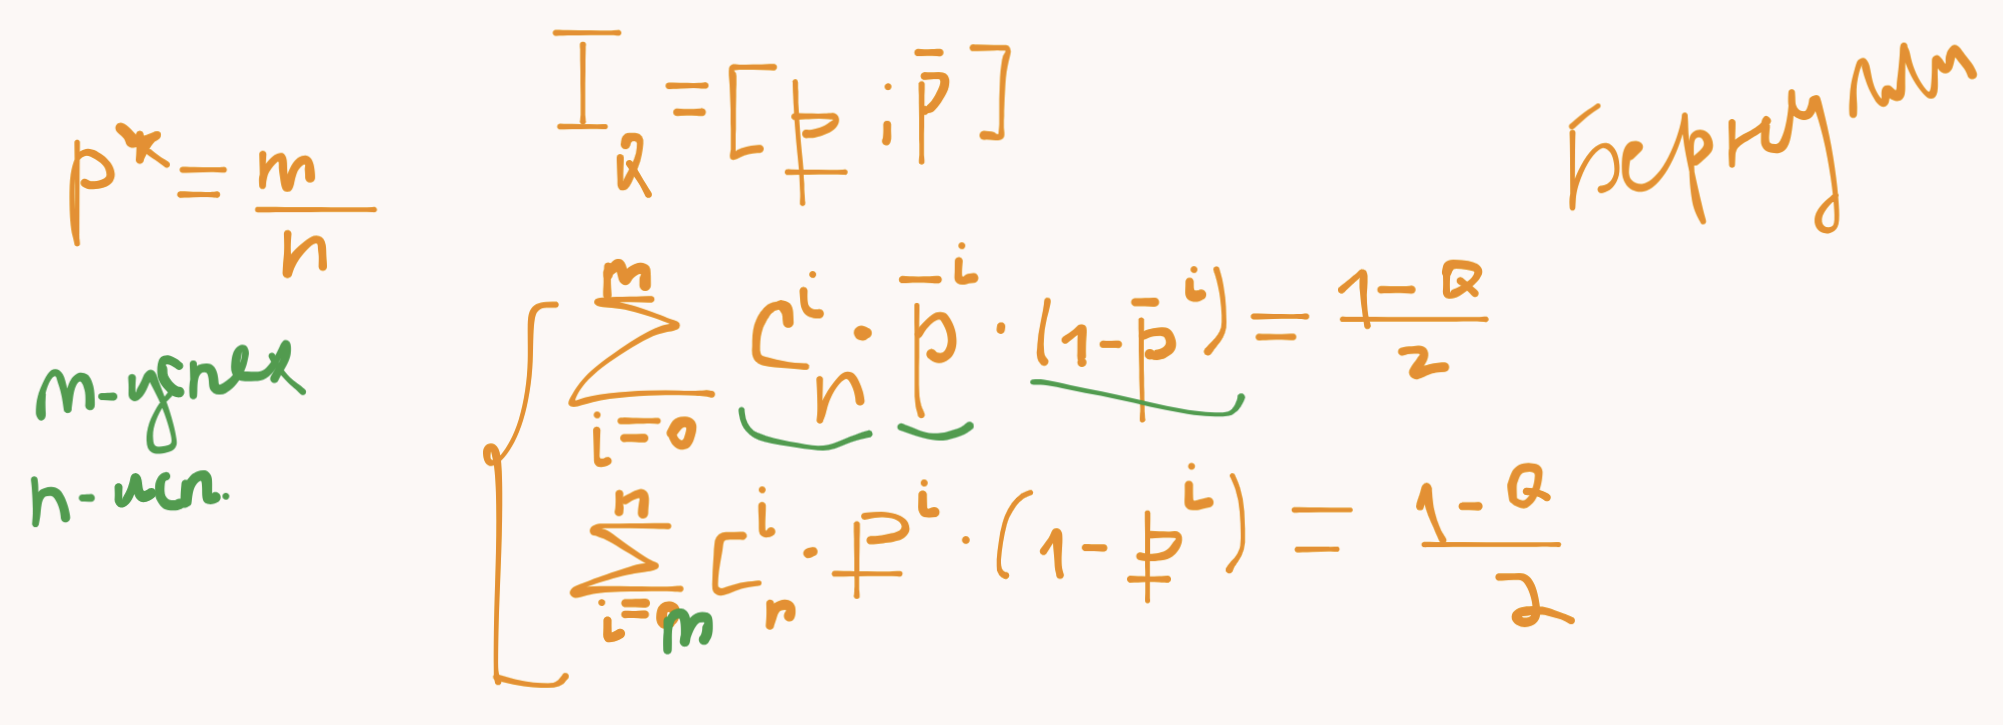

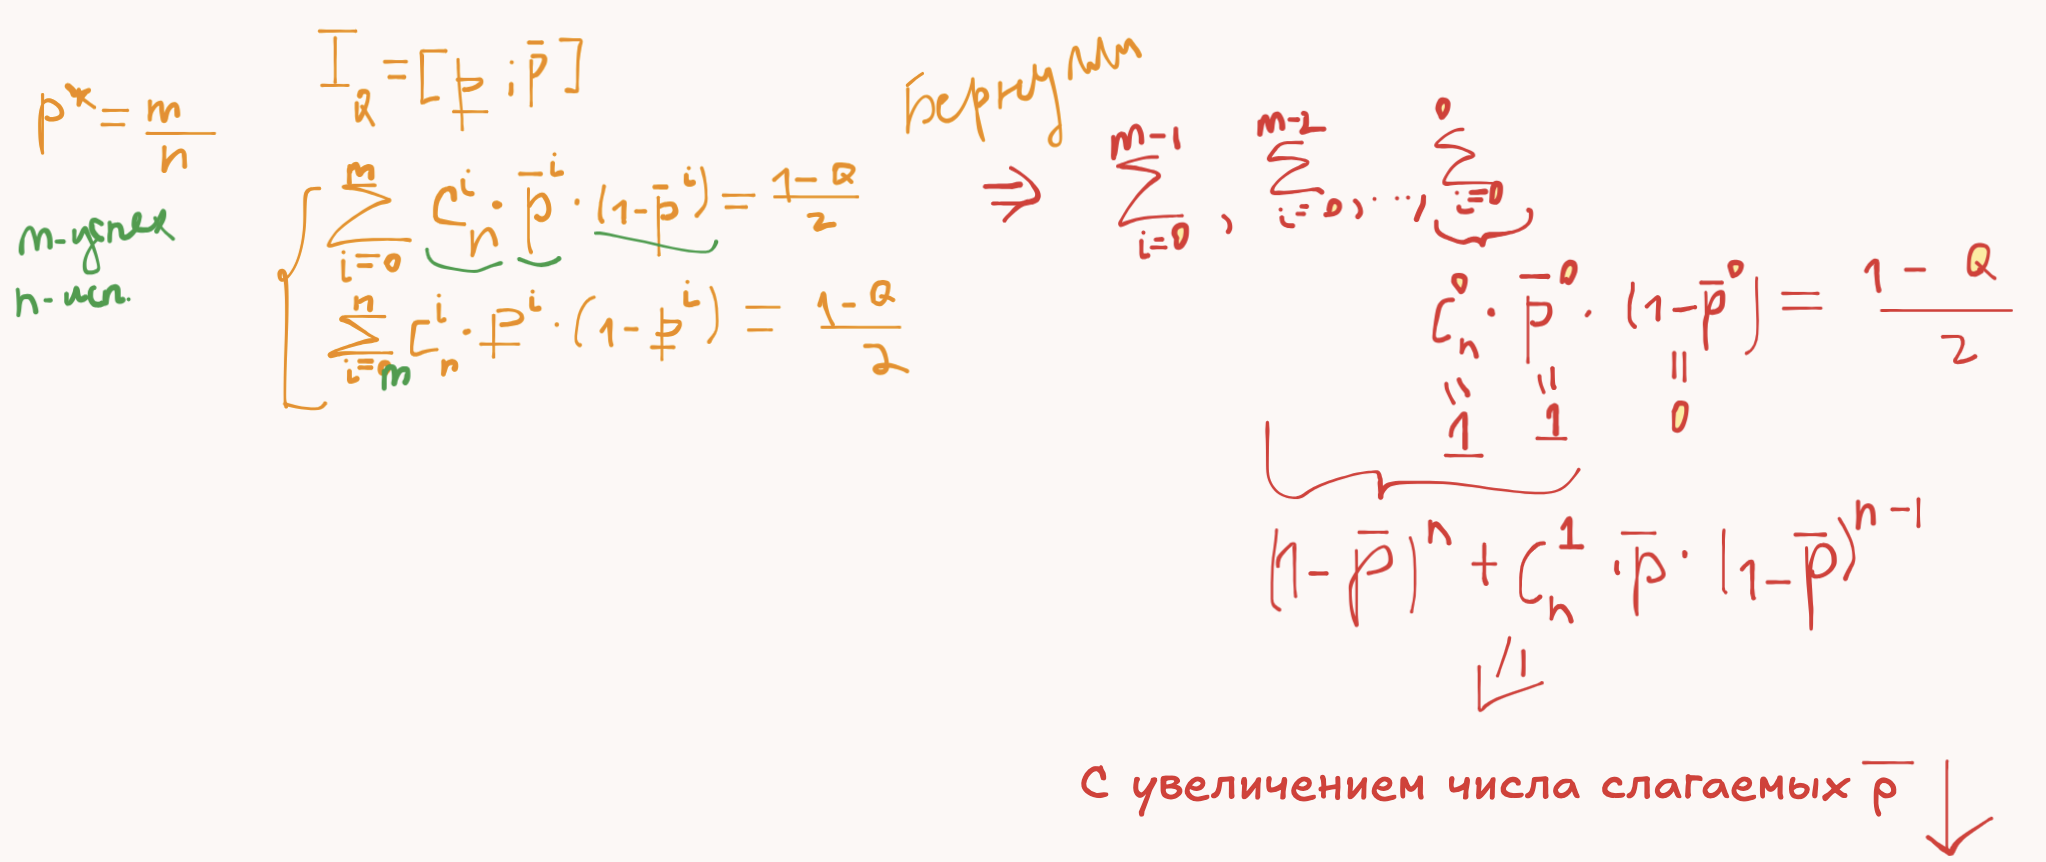

In [45]:
import numpy as np
from scipy.stats import norm

def clopper_pearson_proportion(x, n, alpha=0.05):
  """
  Calculates the Clopper-Pearson confidence interval for a proportion.

  Args:
    x: The number of successes.
    n: The total number of trials.
    alpha: The significance level (default is 0.05).

  Returns:
    A tuple containing the lower and upper bounds of the confidence interval.
  """
  if x == 0:
    lower_bound = 0
  else:
    lower_bound = norm.ppf(alpha / 2, loc=x / n, scale=np.sqrt(x / n * (1 - x / n) / n))

  if x == n:
    upper_bound = 1
  else:
    upper_bound = norm.ppf(1 - alpha / 2, loc=x / n, scale=np.sqrt(x / n * (1 - x / n) / n))

  return lower_bound, upper_bound


# Example usage:
n = 100  # Total number of trials
x = sum(random.randint(0, 1) for i in range(n))  # Number of successes
alpha = 0.05  # Significance level

lower_bound, upper_bound = clopper_pearson_proportion(x, n, alpha)

print(f"Clopper-Pearson Confidence Interval (alpha={alpha}):")
print(f"Lower Bound: {lower_bound:.4f}")
print(f"Upper Bound: {upper_bound:.4f}")

Clopper-Pearson Confidence Interval (alpha=0.05):
Lower Bound: 0.3623
Upper Bound: 0.5577


In [34]:
import scipy.stats
import math
import random


def clopper_pearson(x, n, alpha=0.05):
    """Estimate the confidence interval for a sampled Bernoulli random
    variable.
    `x` is the number of successes and `n` is the number trials (x <=
    n). `alpha` is the confidence level (i.e., the true probability is
    inside the confidence interval with probability 1-alpha). The
    function returns a `(low, high)` pair of numbers indicating the
    interval on the probability.
    """
    b = scipy.stats.beta.ppf
    lo = b(alpha / 2, x, n - x + 1)
    hi = b(1 - alpha / 2, x + 1, n - x)
    return 0.0 if math.isnan(lo) else lo, 1.0 if math.isnan(hi) else hi


# As a test, estimate the probability of a fair coin (p=0.5) using 100 flips.
if __name__ == '__main__':
    total = 100
    successes = sum(random.randint(0, 1) for i in range(total))
    lo, hi = clopper_pearson(successes, total)
    print('95% confidence interval: {:.2f}-{:.2f}'.format(lo, hi))

95% confidence interval: 0.38-0.58


http://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval



In [47]:
from statsmodels.stats.proportion import proportion_confint

def clopper_pearson_interval(num_success, num_total, alpha):
    """
    Calculate the Clopper-Pearson confidence interval.

    Args:
        num_success (int): Number of successes.
        num_total (int): Total number of trials.
        alpha (float): Significance level.

    Returns:
        tuple: Lower and upper bounds of the confidence interval.
    """
    return proportion_confint(num_success, num_total, alpha=2 * alpha, method="beta")

num_total = 100
num_successes = sum(random.randint(0, 1) for i in range(num_total))

clopper_pearson_interval(num_successes, num_total, alpha=0.95)

(0.566768149980587, 0.41362171463091163)

In [5]:
import scipy.stats as stats
import numpy as np
from collections import OrderedDict

class BPCI(object):
    """
    Binomial Proportion Confidence Interval:
        sample – sample to calculate confidence interval (e.g. [100, 200, 300]);
        alpha = (1 - confidence level);
    """
    def __init__(self, sample, alpha = 0.05):
        self.sample = np.asarray(sample)
        self.alpha = alpha
        self.shape = self.sample.shape[0]
        self.sum = self.sample.sum().astype(np.int64)
        self.percentage = self.sample / self.sum

    def wald(self):
        """
        Wald method (also known as "normal approximation interval"). This approximation
        is based on the central limit theorem and is unreliable when the
        sample size is small or the success probability is close to 0 or 1.
        Returns:
            Method – Method name ('Wald');
            alpha – alpha value;
            Sample – Sample;
            N – Sum of sample;
            Percentage – Percentage of sample;
            Cl – Confidence lower limit;
            Cu – Confidence upper limit;
            Conclusion – for the confidence interval for each option,
            independently of the others, we conclude that it is more plausible:
                1 – if this option is plausible;
                -1 – if negation of this option is plausible;
                0 – if it's not clear;
        """
        Z = abs(stats.norm.ppf(self.alpha / 2))
        yates_coef = 0.5 / self.sum
        delta = Z * abs(self.sample * (self.sum - self.sample) / (self.sum**self.shape))**(1/2) + yates_coef
        Cl = self.percentage - delta
        Cu = self.percentage + delta
        return BPCI_Result(Method = 'Wald',
                           alpha = self.alpha,
                           Sample = self.sample,
                           N = self.sum,
                           Percentage = self.percentage,
                           Cl = Cl,
                           Cu = Cu)

    def clopper_pearson(self):
        """
        The Clopper–Pearson interval is an early and
        very common method for calculating binomial confidence intervals.
        This is often called an 'exact' method, because it is based on
        the cumulative probabilities of the binomial distribution
        (i.e., exactly the correct distribution rather than an approximation).
        However, in cases where we know the population size, the intervals
        may not be the smallest possible, because they include impossible
        proportions: for instance, for a population of size 10, an interval of [0.35, 0.65]
        would be too large as the true proportion cannot lie between 0.35 and 0.4, or
        between 0.6 and 0.65.
        Returns:
            Method – Method name ('Clopper-Pearson');
            alpha – alpha value;
            Sample – Sample;
            N – Sum of sample;
            Percentage – Percentage of sample;
            Cl – Confidence lower limit;
            Cu – Confidence upper limit;
            Conclusion – for the confidence interval for each option,
            independently of the others, we conclude that it is more plausible:
                1 – if this option is plausible;
                -1 – if negation of this option is plausible;
                0 – if it's not clear;
        """
        F_inv_rt_Cl = stats.f.isf(self.alpha/2,
                            dfn = 2 * (1 + self.sum - self.sample),
                            dfd = 2 * self.sample)
        F_inv_rt_Cu = stats.f.isf(self.alpha/2,
                            dfn = 2 * (1 + self.sample),
                            dfd = 2 * (self.sum - self.sample))
        Cl_vect = np.vectorize(self.__clopper_pearson_Cl)
        Cu_vect = np.vectorize(self.__clopper_pearson_Cu)
        Cl = Cl_vect(self.sample, self.sum, F_inv_rt_Cl)
        Cu = Cu_vect(self.sample, self.sum, F_inv_rt_Cu)
        return BPCI_Result(Method = 'Clopper-Pearson',
                           alpha = self.alpha,
                           Sample = self.sample,
                           N = self.sum,
                           Percentage = self.percentage,
                           Cl = Cl,
                           Cu = Cu)

    @staticmethod
    def __clopper_pearson_Cl(s, amount, f_inv_rt):
        if s == 0:
            return 0
        else:
            return s / (s + (1 + amount - s) * f_inv_rt)

    @staticmethod
    def __clopper_pearson_Cu(s, amount, f_inv_rt):
        if s == amount:
            return 1
        else:
            return (s + 1) * f_inv_rt / (amount - s + (s + 1) * f_inv_rt)

class BPCI_Result(OrderedDict):
    def __init__(self, *args, **kwargs):
        super(BPCI_Result, self).__init__(*args, **kwargs)
        self.__values = list(super(BPCI_Result, self).values())[4:7]
        super(BPCI_Result, self).update(Conclusion = self.__conclusion())

    def __conclusion(self):
        return np.vectorize(self.__make_conclusion)(*self.__values)

    @staticmethod
    def __make_conclusion(p, cl, cu):
        if 0.5 > cl and 0.5 < cu:
            return 0
        return 1 if p >= 0.5 else -1

if __name__ == '__main__':
    """
    Lets make some tests!
    You've conducted a survey of shop visitors. The question is "How did prices change?".
    Here are the results:
        74122 votes – "Prices have increased";
        11098 votes – "Prices have not changed";
        85989 votes – "Prices have decreased".
    Now you need to decide which one is true with 95% confidence level.
    """

    shop_survey = BPCI([74122, 11098, 85989], alpha = 0.05)
    print(shop_survey.wald())

    """
    BPCI_Result([('Method', 'Wald'),
             ('alpha', 0.05),
             ('Sample', array([74122, 11098, 85989])),
             ('N', 171209),
             ('Percentage', array([0.43293285, 0.06482136, 0.50224579])),
             ('Cl', array([0.43058293, 0.06365219, 0.4998745 ])),
             ('Cu', array([0.43528276, 0.06599053, 0.50461709])),
             ('Conclusion', array([-1, -1,  0]))])
    """

    print(shop_survey.clopper_pearson())

    """
    BPCI_Result([('Method', 'Clopper-Pearson'),
             ('alpha', 0.05),
             ('Sample', array([74122, 11098, 85989])),
             ('N', 171209),
             ('Percentage', array([0.43293285, 0.06482136, 0.50224579])),
             ('Cl', array([0.43058408, 0.06365957, 0.49987448])),
             ('Cu', array([0.43528388, 0.06599791, 0.50461703])),
             ('Conclusion', array([-1, -1,  0]))])

    As you can see, only the last option ("Prices have decreased")
    is more likely to be true in both cases.
    """

BPCI_Result([('Method', 'Wald'), ('alpha', 0.05), ('Sample', array([74122, 11098, 85989])), ('N', 171209), ('Percentage', array([0.43293285, 0.06482136, 0.50224579])), ('Cl', array([0.43058293, 0.06365219, 0.4998745 ])), ('Cu', array([0.43528276, 0.06599053, 0.50461709])), ('Conclusion', array([-1, -1,  0]))])
BPCI_Result([('Method', 'Clopper-Pearson'), ('alpha', 0.05), ('Sample', array([74122, 11098, 85989])), ('N', 171209), ('Percentage', array([0.43293285, 0.06482136, 0.50224579])), ('Cl', array([0.43058408, 0.06365957, 0.49987448])), ('Cu', array([0.43528388, 0.06599791, 0.50461703])), ('Conclusion', array([-1, -1,  0]))])


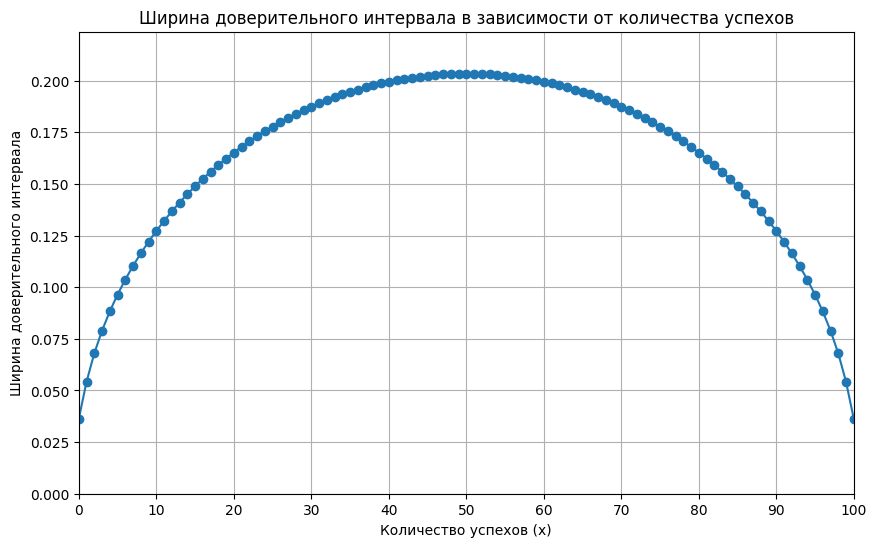

In [6]:
import scipy.stats
import math
import numpy as np
import matplotlib.pyplot as plt

def clopper_pearson(x, n, alpha=0.05):
    """Estimate the confidence interval for a sampled Bernoulli random variable."""
    b = scipy.stats.beta.ppf
    lo = b(alpha / 2, x, n - x + 1)
    hi = b(1 - alpha / 2, x + 1, n - x)
    return 0.0 if math.isnan(lo) else lo, 1.0 if math.isnan(hi) else hi

# Параметры
n = 100
alpha = 0.05
successes = np.arange(0, n + 1)  # Количество успехов от 0 до 100

# Ширины доверительных интервалов
widths = []
for x in successes:
    lo, hi = clopper_pearson(x, n, alpha)
    widths.append(hi - lo)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(successes, widths, marker='o')
plt.title('Ширина доверительного интервала в зависимости от количества успехов')
plt.xlabel('Количество успехов (x)')
plt.ylabel('Ширина доверительного интервала')
plt.grid()
plt.axhline(0, color='black', lw=0.5, ls='--')  # Граница на уровне 0
plt.xlim(0, n)
plt.ylim(0, max(widths) * 1.1)  # Увеличиваем предел по Y для визуализации
plt.xticks(np.arange(0, n + 1, 10))  # Шаг по оси X
plt.show()


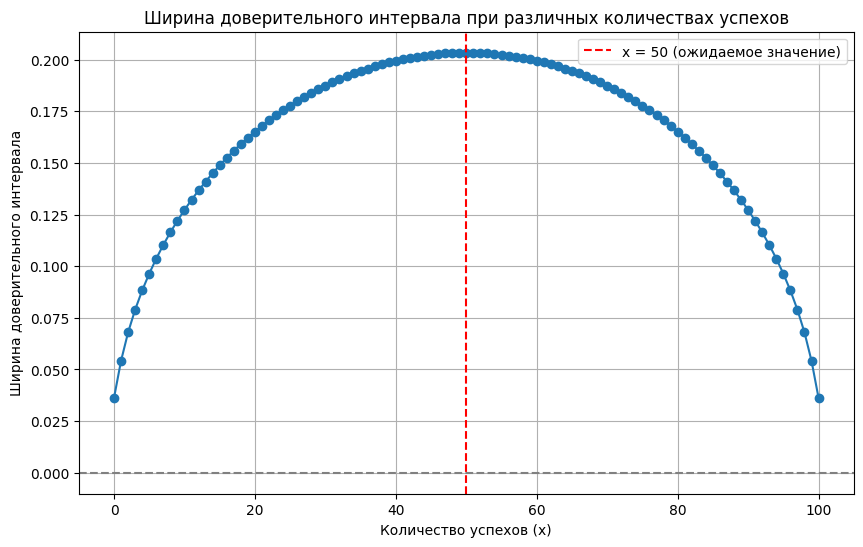

In [7]:
import scipy.stats
import math
import matplotlib.pyplot as plt

def clopper_pearson(x, n, alpha=0.05):
    """Estimate the confidence interval for a sampled Bernoulli random
    variable."""
    b = scipy.stats.beta.ppf
    lo = b(alpha / 2, x, n - x + 1)
    hi = b(1 - alpha / 2, x + 1, n - x)
    return 0.0 if math.isnan(lo) else lo, 1.0 if math.isnan(hi) else hi

# Параметры для эксперимента
n = 100
alpha = 0.05
successes = list(range(n + 1))  # Количество успехов от 0 до 100
widths = []  # Список для хранения ширины доверительного интервала

# Вычисление ширины доверительного интервала для каждого количества успехов
for x in successes:
    lo, hi = clopper_pearson(x, n, alpha)
    widths.append(hi - lo)  # Ширина интервала

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(successes, widths, marker='o')
plt.title('Ширина доверительного интервала при различных количествах успехов')
plt.xlabel('Количество успехов (x)')
plt.ylabel('Ширина доверительного интервала')
plt.grid()
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=n/2, color='red', linestyle='--', label='x = 50 (ожидаемое значение)')
plt.legend()
plt.show()


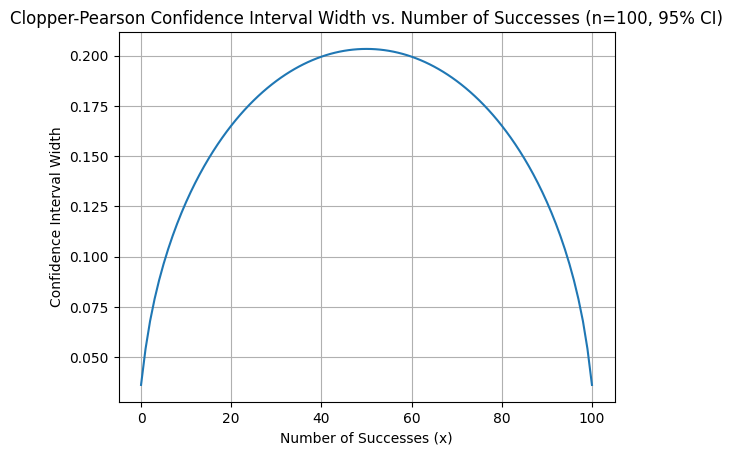

In [8]:
import scipy.stats
import math
import random
import matplotlib.pyplot as plt

def clopper_pearson(x, n, alpha=0.05):
    b = scipy.stats.beta.ppf
    lo = b(alpha / 2, x, n - x + 1)
    hi = b(1 - alpha / 2, x + 1, n - x)
    return 0.0 if math.isnan(lo) else lo, 1.0 if math.isnan(hi) else hi

n = 100
widths = []
x_values = range(n + 1)

for x in x_values:
    lo, hi = clopper_pearson(x, n)
    width = hi - lo
    widths.append(width)

plt.plot(x_values, widths)
plt.xlabel("Number of Successes (x)")
plt.ylabel("Confidence Interval Width")
plt.title("Clopper-Pearson Confidence Interval Width vs. Number of Successes (n=100, 95% CI)")
plt.grid(True)
plt.show()

{0.1: [0.988, 0.961, 0.953, 0.964, 0.967, 0.962], 0.5: [0.975, 0.971, 0.969, 0.961, 0.956, 0.947], 0.9: [0.99, 0.974, 0.956, 0.963, 0.968, 0.963]}


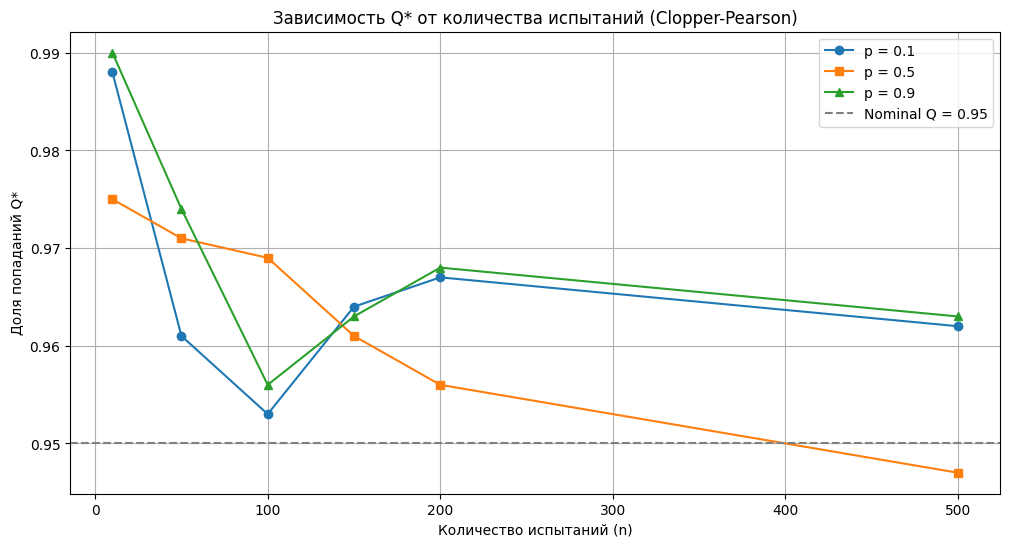

In [48]:
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np


# Параметры моделирования
N = 10 ** 3  # Количество повторов моделирования
n_values = [10, 50, 100, 150, 200, 500]  # Количество испытаний
p_values = [0.1, 0.5, 0.9]  # Вероятность успеха
alpha = 0.05  # Уровень значимости (1-Q)

results = {}  # Хранение результатов моделирования

for p in p_values:
    results[p] = []
    for n in n_values:
        success_counts = []
        for _ in range(N):
            successes = np.random.binomial(n, p)
            success_counts.append(successes)

        coverage_count = 0  # Кол-во раз, когда p попало в доверительный интервал
        for x in success_counts:
            lo, hi = clopper_pearson(x, n, alpha)
            if lo <= p <= hi:
                coverage_count += 1

        q_star = coverage_count / N  # Доля попаданий
        results[p].append(q_star)


print(results)

plt.figure(figsize=(12, 6))
markers = ['o', 's', '^'] # Для разных p
for i, p in enumerate(p_values):
    plt.plot(n_values, results[p], marker=markers[i], label=f'p = {p}')

plt.axhline(y=0.95, color='gray', linestyle='--', label='Nominal Q = 0.95')
plt.xlabel('Количество испытаний (n)')
plt.ylabel('Доля попаданий Q*')
plt.title('Зависимость Q* от количества испытаний (Clopper-Pearson)')
plt.legend()
plt.grid(True)
plt.show()

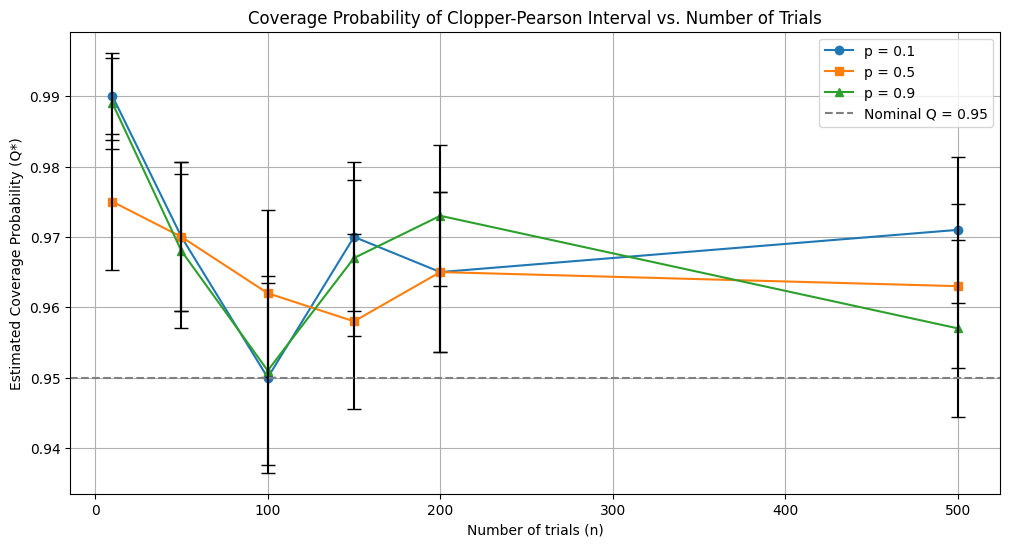

In [49]:
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import math

def clopper_pearson(x, n, alpha=0.05):
    """Estimate the confidence interval for a sampled Bernoulli random
    variable."""
    b = scipy.stats.beta.ppf
    lo = b(alpha / 2, x, n - x + 1)
    hi = b(1 - alpha / 2, x + 1, n - x)
    return 0.0 if math.isnan(lo) else lo, 1.0 if math.isnan(hi) else hi

# Parameters
N = 1000  # Number of simulations
n_values = [10, 50, 100, 150, 200, 500]
p_values = [0.1, 0.5, 0.9]
alpha = 0.05
results = {}

for p in p_values:
    results[p] = []
    for n in n_values:
        success_counts = []
        for _ in range(N):
            successes = np.random.binomial(n, p)
            success_counts.append(successes)

        coverage_count = 0
        for x in success_counts:
            lo, hi = clopper_pearson(x, n, alpha)
            if lo <= p <= hi:
                coverage_count += 1

        q_star = coverage_count / N
        results[p].append(q_star)


# Plotting
plt.figure(figsize=(12, 6))
markers = ['o', 's', '^']
for i, p in enumerate(p_values):
    plt.plot(n_values, results[p], marker=markers[i], label=f'p = {p}')

# Add error bars (confidence intervals for Q*)
for i, p in enumerate(p_values):
    lower_ci = [0.0] * len(n_values)
    upper_ci = [0.0] * len(n_values)
    for j, n in enumerate(n_values):
        q_star = results[p][j]
        se = math.sqrt(q_star * (1 - q_star) / N)
        lower_ci[j] = max(0, q_star - 1.96 * se)
        upper_ci[j] = min(1, q_star + 1.96 * se)
    plt.errorbar(n_values, results[p], yerr=[np.array(results[p]) - np.array(lower_ci),
                                           np.array(upper_ci) - np.array(results[p])], fmt='none', ecolor='black', capsize=5)


plt.axhline(y=0.95, color='gray', linestyle='--', label='Nominal Q = 0.95')
plt.xlabel('Number of trials (n)')
plt.ylabel('Estimated Coverage Probability (Q*)')
plt.title('Coverage Probability of Clopper-Pearson Interval vs. Number of Trials')
plt.legend()
plt.grid(True)
plt.show()